In [ ]:
import numpy as np
import pandas as pd, datetime
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import acf, pacf
from matplotlib.pylab import rcParams

In [ ]:
df=pd.read_excel("RBRTEd.xls", sheet_name='Data 1',header=None)
df

,0,1
0,Back to Contents,Data 1: Europe Brent Spot Price FOB (Dollars p...
1,Sourcekey,RBRTE
2,Date,Europe Brent Spot Price FOB (Dollars per Barrel)
3,1987-05-20 00:00:00,18.63
4,1987-05-21 00:00:00,18.45
...,...,...
8899,2022-06-07 00:00:00,126.89
8900,2022-06-08 00:00:00,129.2
8901,2022-06-09 00:00:00,128.47
8902,2022-06-10 00:00:00,127.44


In [ ]:
df2 = df.iloc[3:8904]
df2.head(5)

,0,1
3,1987-05-20 00:00:00,18.63
4,1987-05-21 00:00:00,18.45
5,1987-05-22 00:00:00,18.55
6,1987-05-25 00:00:00,18.6
7,1987-05-26 00:00:00,18.63


In [ ]:
df2.columns =['Date', 'Oil_Prices']
df2.head(5)

,Date,Oil_Prices
3,1987-05-20 00:00:00,18.63
4,1987-05-21 00:00:00,18.45
5,1987-05-22 00:00:00,18.55
6,1987-05-25 00:00:00,18.6
7,1987-05-26 00:00:00,18.63


In [ ]:
df2.reset_index(drop=True)

,Date,Oil_Prices
0,1987-05-20 00:00:00,18.63
1,1987-05-21 00:00:00,18.45
2,1987-05-22 00:00:00,18.55
3,1987-05-25 00:00:00,18.6
4,1987-05-26 00:00:00,18.63
...,...,...
8896,2022-06-07 00:00:00,126.89
8897,2022-06-08 00:00:00,129.2
8898,2022-06-09 00:00:00,128.47
8899,2022-06-10 00:00:00,127.44


In [ ]:
print("Data Set:"% df2.columns, df2.shape)
print("Data Types:", df2.dtypes)

Data Set: (8901, 2)
Data Types: Date          object
Oil_Prices    object
dtype: object


In the above dataset, we have noticed that the series does not contain the values for Saturday and Sunday, if you look closely  11th and 12th June 2022 (weekends data) are seem to be missing and this is because the market is closed on weekends.
                                   ![image.png](attachment:image.png)
Hence these missing values were needed to be filled. To fill in weekends, first we used date as index (for resample method), then used forward fill, which will assign the weekend values with Friday values. Resample method is used for frequency conversion and resampling of time series. Object must have a datetime-like index (DatetimeIndex, PeriodIndex, or TimedeltaIndex), or pass datetime-like values to the on or level keyword.

In [ ]:
df2.set_index('Date', inplace=True)
oilPrices = df2.resample('D').ffill().reset_index()
oilPrices.tail(10)

,Date,Oil_Prices
12799,2022-06-04,125.68
12800,2022-06-05,125.68
12801,2022-06-06,124.99
12802,2022-06-07,126.89
12803,2022-06-08,129.2
12804,2022-06-09,128.47
12805,2022-06-10,127.44
12806,2022-06-11,127.44
12807,2022-06-12,127.44
12808,2022-06-13,128.44


In [ ]:
oilPrices.isnull().values.any()

False

In [ ]:
oilPrices['year']=oilPrices['Date'].dt.year
oilPrices['month']=oilPrices['Date'].dt.month
oilPrices['week']=oilPrices['Date'].dt.week

C:\Users\Tripti\AppData\Local\Temp\ipykernel_4188\841508214.py:3: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  oilPrices['week']=oilPrices['Date'].dt.week


In [ ]:
oilPrices.tail(40)

,Date,Oil_Prices,year,month,week
12769,2022-05-05,112.11,2022,5,18
12770,2022-05-06,113.86,2022,5,18
12771,2022-05-07,113.86,2022,5,18
12772,2022-05-08,113.86,2022,5,18
12773,2022-05-09,106.67,2022,5,19
12774,2022-05-10,102.61,2022,5,19
12775,2022-05-11,107.7,2022,5,19
12776,2022-05-12,108.06,2022,5,19
12777,2022-05-13,112.12,2022,5,19
12778,2022-05-14,112.12,2022,5,19


# EDA

In [ ]:
oilPrices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12809 entries, 0 to 12808
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        12809 non-null  datetime64[ns]
 1   Oil_Prices  12809 non-null  object        
 2   year        12809 non-null  int64         
 3   month       12809 non-null  int64         
 4   week        12809 non-null  int64         
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 500.5+ KB


<AxesSubplot:xlabel='Year', ylabel='Crude Oil Prices trend: Brent - Europe'>

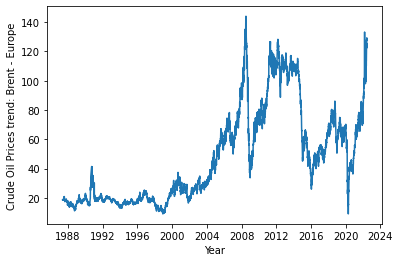

In [ ]:
plt.ylabel("Crude Oil Prices trend: Brent - Europe")
plt.xlabel("Year")
sns.lineplot(x='Date',y='Oil_Prices',data = oilPrices)

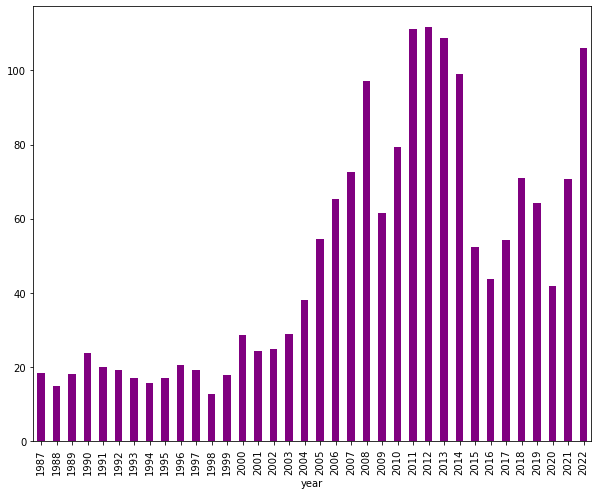

In [ ]:
plt.figure(figsize=(10,8))
oilPrices.groupby('year')['Oil_Prices'].mean().plot(kind='bar',color = 'purple')
plt.show()

From both the above line and bar graphs, it can be seen that the Oil prices tend to show an upward trend from 1987 till 2011 before dropping dramatically towards 2015. From 2015 onwards, the prices seem to fluctuate with some peaks and falls but is showing a growing trend from 2020 upto present.

C:\Users\Tripti\anaconda3\envs\streamlit\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Oil_Prices'>

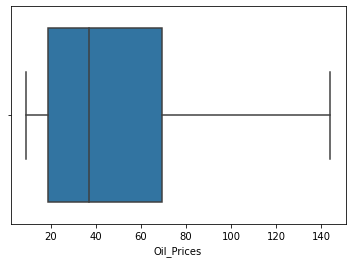

In [ ]:
sns.boxplot("Oil_Prices",data=oilPrices)

There seems be to be no outliers present in our prices data. The series seem to be positively skewed showing no normal distribution of the data points.

<AxesSubplot:xlabel='month', ylabel='year'>

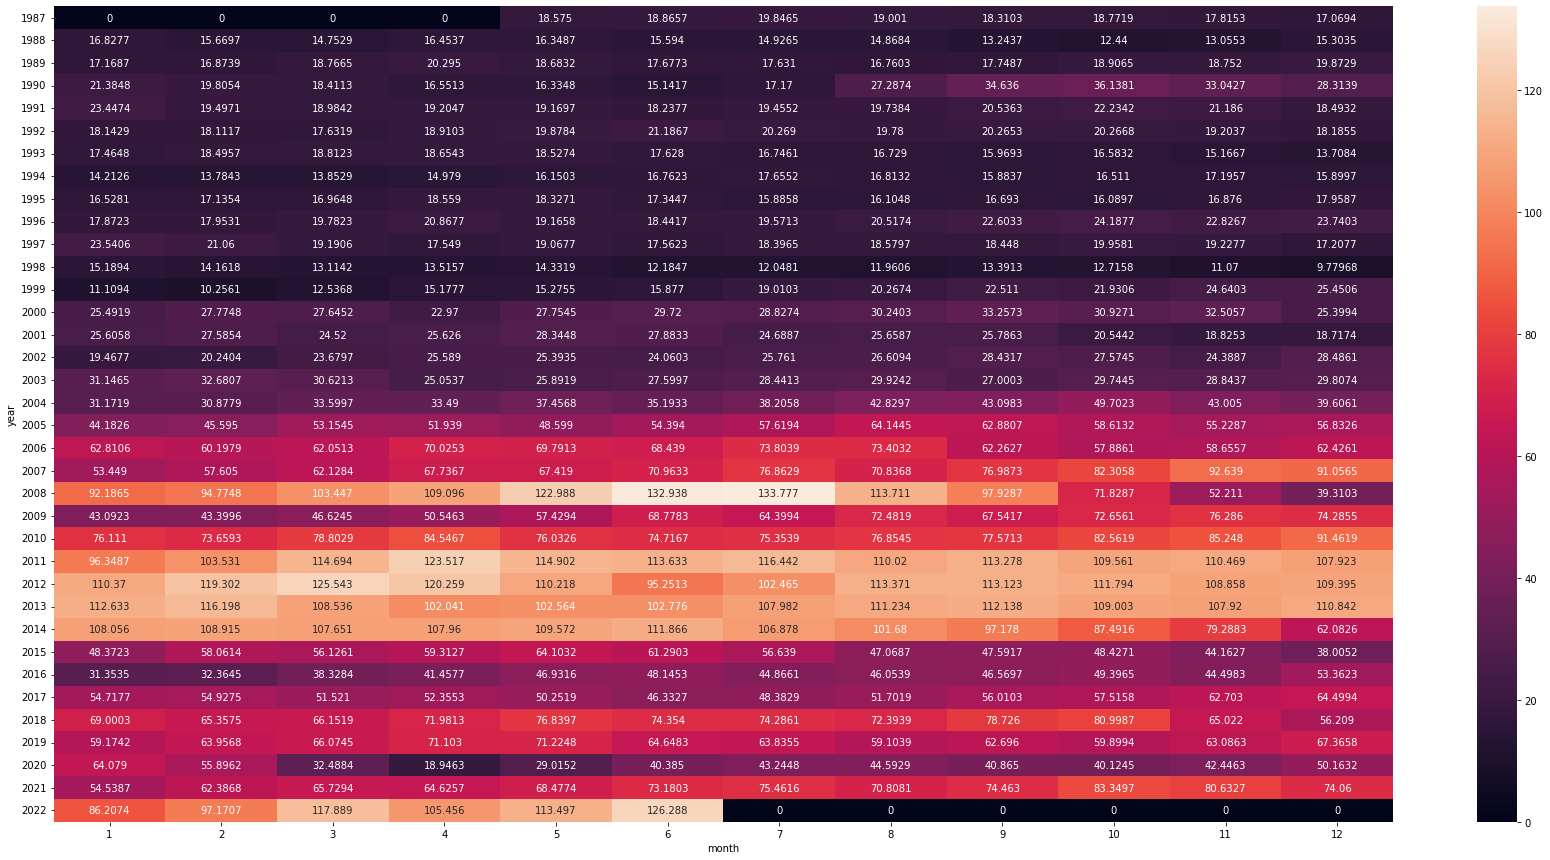

In [ ]:
plt.figure(figsize=(30,15))
heatmap_y_month = pd.pivot_table(data=oilPrices,values="Oil_Prices",index="year",columns="month",aggfunc="mean",fill_value=0)
sns.heatmap(heatmap_y_month,annot=True,fmt="g") #fmt is format of the grid values

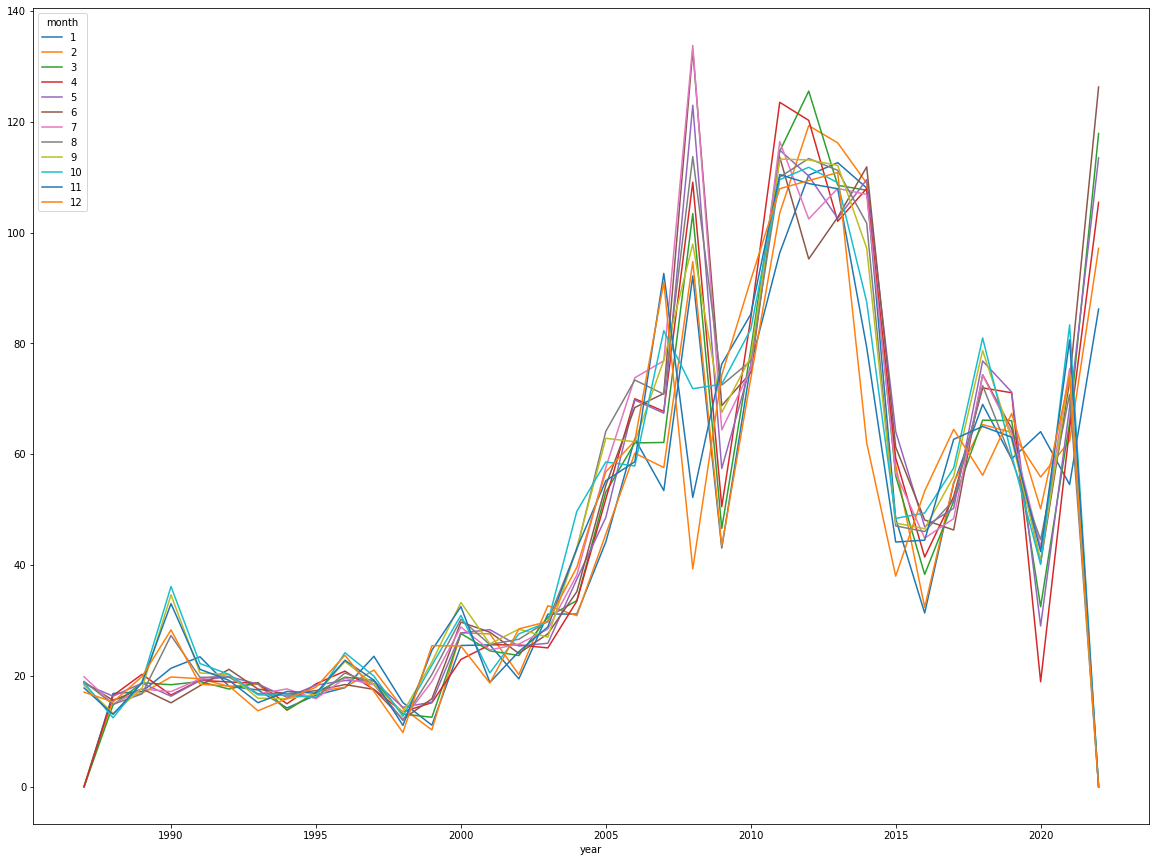

In [ ]:
heatmap_y_month.plot(figsize=(20,15))
plt.show()

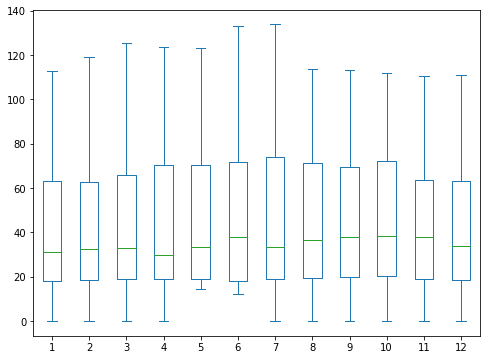

In [ ]:
heatmap_y_month.plot(kind='box',figsize=(8,6))
plt.show()

### Checking the Normality of the series

C:\Users\Tripti\anaconda3\envs\streamlit\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Oil_Prices', ylabel='Density'>

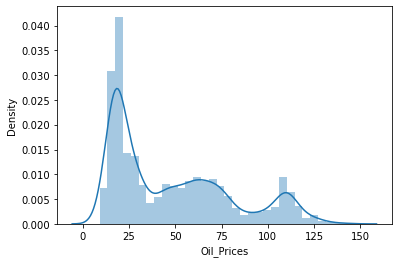

In [ ]:
#Distribution Plot
sns.distplot(oilPrices["Oil_Prices"])

In [ ]:
#Jarque Bera Stastical Test for Normality
from scipy.stats import jarque_bera as jb
is_norm=jb(oilPrices["Oil_Prices"])[1]
print(f"p value:{is_norm.round(4)}", ", Series is Normal" if is_norm >0.05 else ", Series is not Normal")

p value:0.0 , Series is not Normal


### Checking the Stationarity of the Series using ADFuller test and KPSS Test

#### Augmented Dickey-Fuller Test (ADFuller Test)
ADF test is conducted with the following assumptions :

1. Null Hypothesis (HO): Series is non-stationary.
2. Alternate Hypothesis(HA): Series is stationary.

If the null hypothesis is failed to be rejected, this test may provide evidence that the series is non-stationary.

Conditions to Reject Null Hypothesis(HO):
If Test statistic < Critical Value and p-value < 0.05 – Reject Null Hypothesis(HO) i.e., time series does not have a unit root, meaning it is stationary. It does not have a time-dependent structure.

In [ ]:
#Augmented Dickey-Fuller Test (ADFuller Test)
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = pd.Series(timeseries).rolling(window=365).mean()
    rolstd = pd.Series(timeseries).rolling(window=365).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

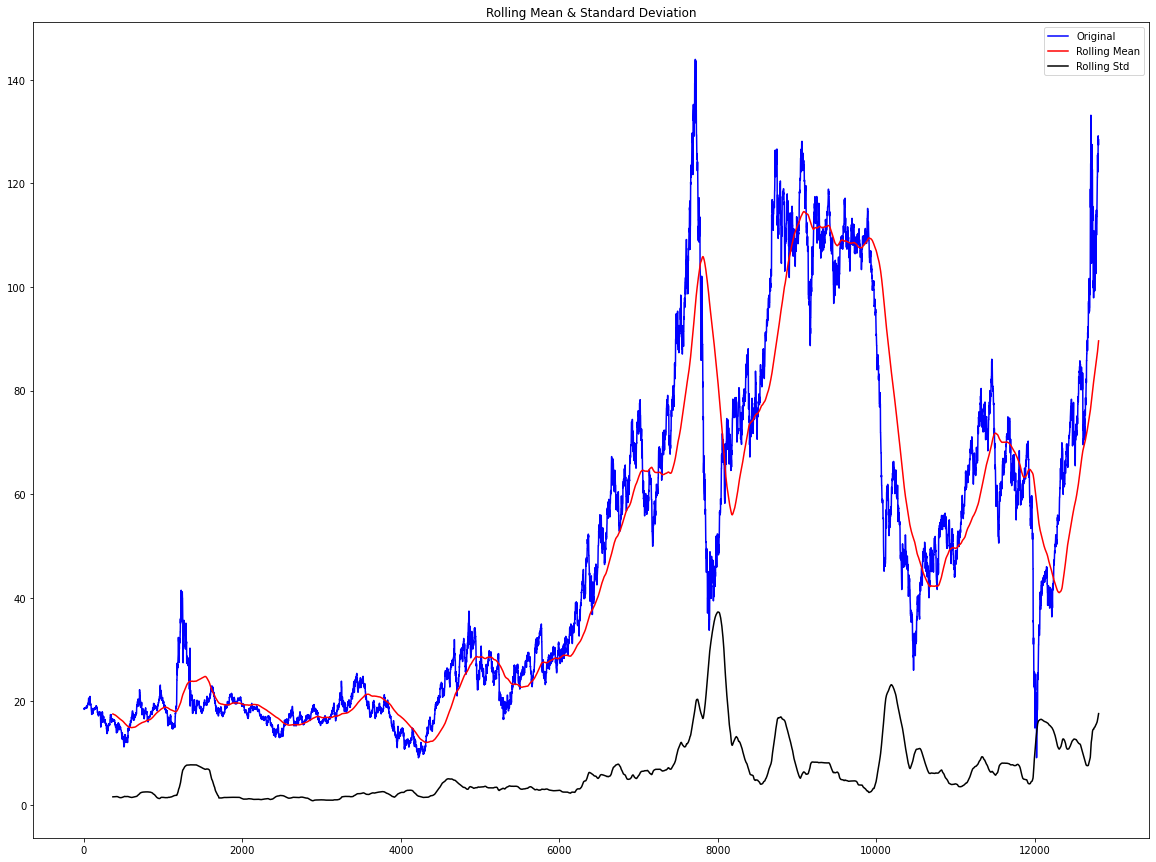

Results of Dickey-Fuller Test:
Test Statistic                    -1.382824
p-value                            0.590482
#Lags Used                        41.000000
Number of Observations Used    12767.000000
Critical Value (1%)               -3.430862
Critical Value (5%)               -2.861766
Critical Value (10%)              -2.566891
dtype: float64


In [ ]:
plt.figure(figsize=(20,15))
test_stationarity(oilPrices["Oil_Prices"])

The p-value obtained is greater than significance level of 0.05 and the ADF test statistic is higher than any of the critical values. Clearly, there is no reason to reject the null hypothesis. So, the time series is in fact non-stationary.

#### Kwiatkowski-Phillips-Schmidt-Shin (KPSS) Test
Let us try using the Kwiatkowski-Phillips-Schmidt-Shin (KPSS) Test and check if we get the same results i.e. the given series is not stationary. 

KPSS test is conducted with the following assumptions: 

1. Null Hypothesis (HO): Series is trend stationary.

2. Alternate Hypothesis(HA): Series is non-stationary. 

###### Note: Hypothesis is reversed in KPSS test compared to ADF Test.

If the null hypothesis is failed to be rejected, this test may provide evidence that the series is trend stationary.

Conditions to Fail to Reject Null Hypothesis(HO)-
If Test statistic < Critical Value and p-value < 0.05 – Fail to Reject Null Hypothesis(HO) i.e., time series does not have a unit root, meaning it is trend stationary.


In [ ]:
#Kwiatkowski-Phillips-Schmidt-Shin (KPSS) Test
from statsmodels.tsa.stattools import kpss
def kpss_test(timeseries):
    print ('Results of KPSS Test:')
    kpsstest = kpss(timeseries, regression='c', nlags="auto")
    kpss_output = pd.Series(kpsstest[0:3], index=['Test Statistic','p-value','#Lags Used'])
    for key,value in kpsstest[3].items():
        kpss_output['Critical Value (%s)'%key] = value
    print (kpss_output)

In [ ]:
kpss_test(oilPrices["Oil_Prices"])

Results of KPSS Test:
Test Statistic           10.99652
p-value                   0.01000
#Lags Used               70.00000
Critical Value (10%)      0.34700
Critical Value (5%)       0.46300
Critical Value (2.5%)     0.57400
Critical Value (1%)       0.73900
dtype: float64


C:\Users\Tripti\anaconda3\envs\streamlit\lib\site-packages\statsmodels\tsa\stattools.py:2018: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(


Here Test Statistic > Critical Value and p-value < 0.05. As a result, we reject the Null hypothesis in favor of an Alternative.
Hence we conclude series is non-stationary. 

Therefore we can confirm from both the tests that our data series is not stationary and will require some transformations as pre-processing part before building our prediction models. 

### Time-Series Decomposition to understand the trend and seasonality

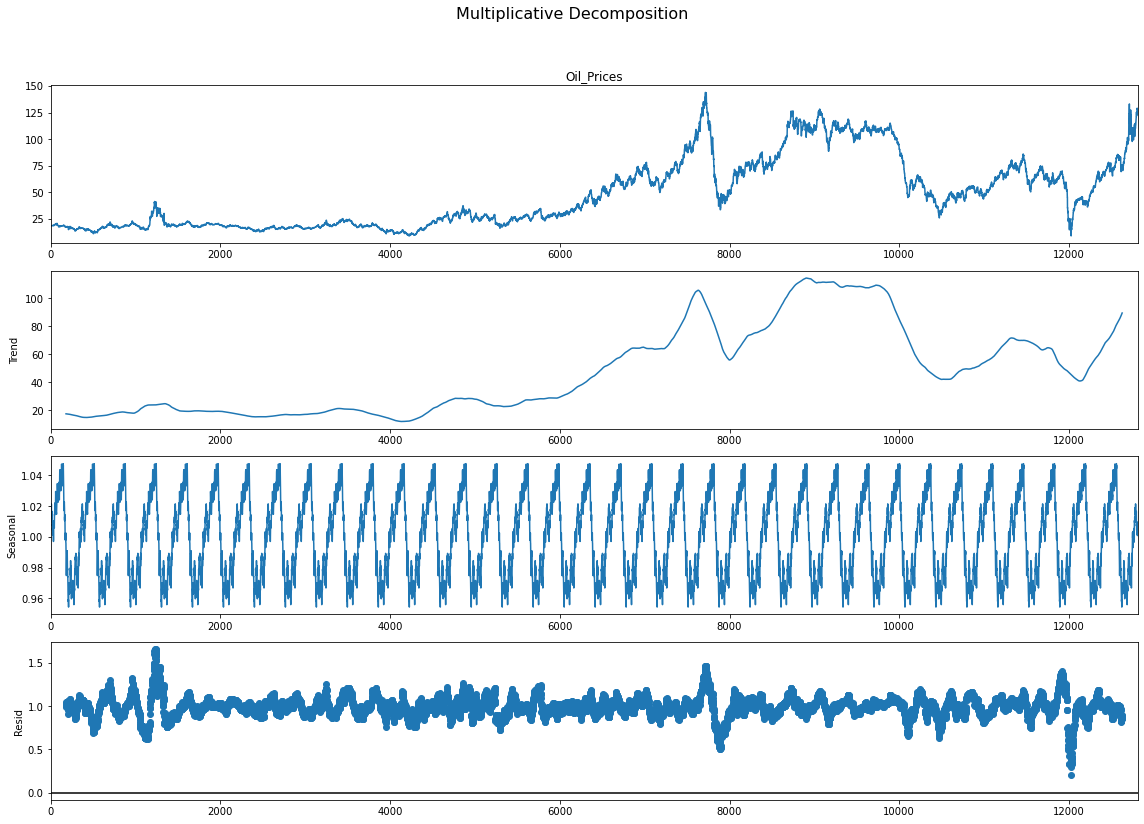

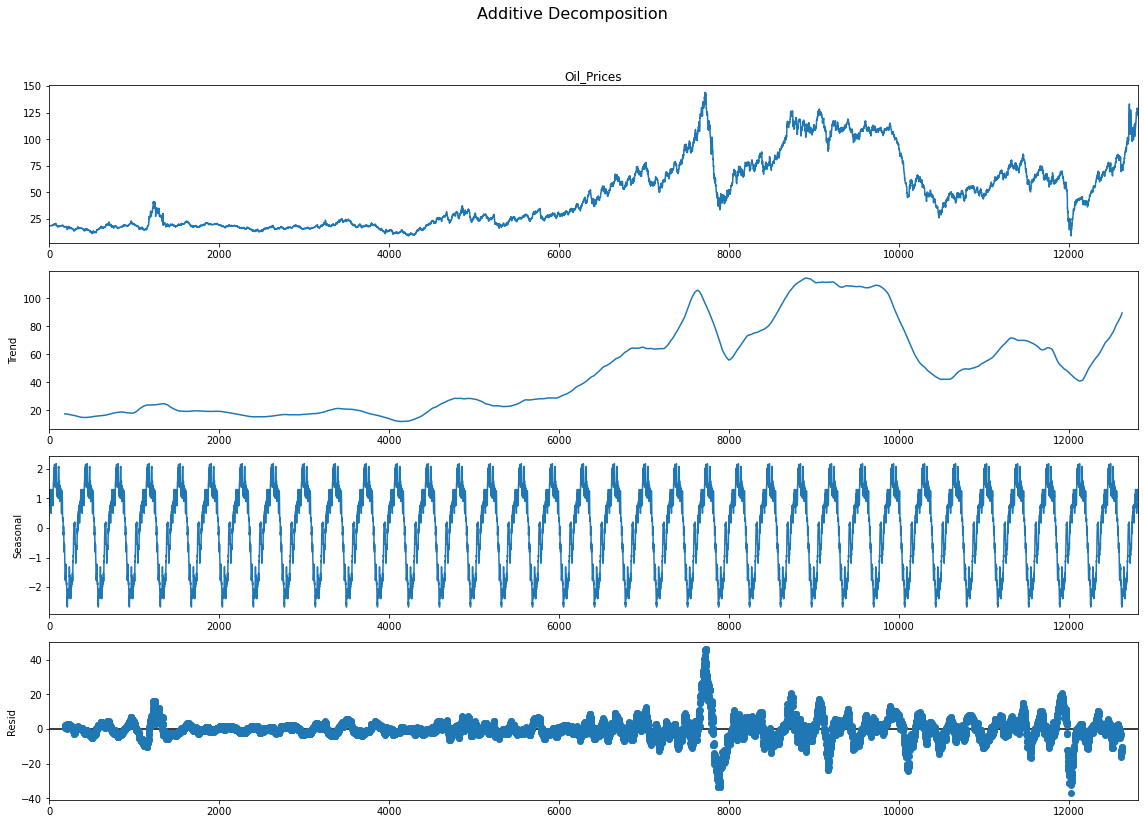

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse


# Multiplicative Decomposition 
multiplicative_decomposition = seasonal_decompose(oilPrices["Oil_Prices"], model='multiplicative', period=365)

# Additive Decomposition
additive_decomposition = seasonal_decompose(oilPrices["Oil_Prices"], model='additive', period=365)

# Plot
plt.rcParams.update({'figure.figsize': (16,12)})
multiplicative_decomposition.plot().suptitle('Multiplicative Decomposition', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

additive_decomposition.plot().suptitle('Additive Decomposition', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.show()

In [ ]:
train = oilPrices[(oilPrices['Date' ] > '1987-05-20') & (oilPrices['Date' ] <= '2019-12-31')]
test = oilPrices[oilPrices['Date' ] >= '2020-01-01']

In [ ]:
print("Training size is : ", train.shape)
print("Testing size is : ", test.shape)

Training size is :  (11913, 5)
Testing size is :  (895, 5)


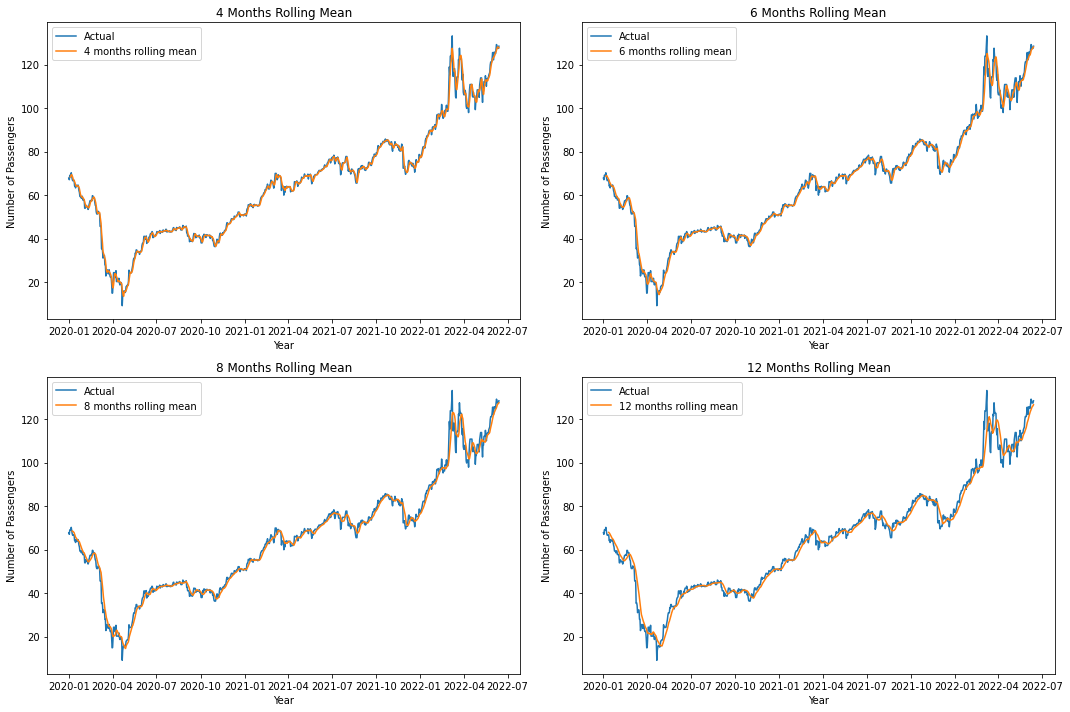

In [ ]:
passengers_count = test["Oil_Prices"]

fig,axes = plt.subplots(2,2)
fig.set_figheight(10)
fig.set_figwidth(15)
axes[0][0].plot(test['Date' ],passengers_count,label='Actual')
axes[0][0].plot(test['Date' ],passengers_count.rolling(window=4).mean(),label='4 months rolling mean')
axes[0][0].set_xlabel('Year')
axes[0][0].set_ylabel('Number of Passengers')
axes[0][0].set_title('4 Months Rolling Mean')
axes[0][0].legend(loc='best')


axes[0][1].plot(test['Date' ],passengers_count,label='Actual')
axes[0][1].plot(test['Date' ],passengers_count.rolling(window=6).mean(),label='6 months rolling mean')
axes[0][1].set_xlabel('Year')
axes[0][1].set_ylabel('Number of Passengers')
axes[0][1].set_title('6 Months Rolling Mean')
axes[0][1].legend(loc='best')

axes[1][0].plot(test['Date' ],passengers_count,label='Actual')
axes[1][0].plot(test['Date' ],passengers_count.rolling(window=8).mean(),label='8 months rolling mean')
axes[1][0].set_xlabel('Year')
axes[1][0].set_ylabel('Number of Passengers')
axes[1][0].set_title('8 Months Rolling Mean')
axes[1][0].legend(loc='best')


axes[1][1].plot(test['Date' ],passengers_count,label='Actual')
axes[1][1].plot(test['Date' ],passengers_count.rolling(window=12).mean(),label='12 months rolling mean')
axes[1][1].set_xlabel('Year')
axes[1][1].set_ylabel('Number of Passengers')
axes[1][1].set_title('12 Months Rolling Mean')
axes[1][1].legend(loc='best')

plt.tight_layout()
plt.show()

The 12 months moving average produces a good wrinkle free curve as required

## Transformation to make the series stationary
The basic idea is to model the trend and seasonality in this series, so we can remove it and make the series stationary. Then we can go ahead and apply statistical forecasting to the stationary series. And finally we can convert the forecasted values into original by applying the trend and seasonality constrains back to those that we previously separated.

### Trend
The first step is to reduce the trend using transformation, as we can see here that there is a strong positive trend. These transformation can be log, sq-rt, cube root etc . Basically it penalizes larger values more than the smaller. 

### 1. Log Transformation 

In [ ]:
train['Oil_Prices'] = train['Oil_Prices'].astype(float)

C:\Users\Tripti\AppData\Local\Temp\ipykernel_4188\928959758.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['Oil_Prices'] = train['Oil_Prices'].astype(float)


In [ ]:
prices_log = np.log(train.Oil_Prices)

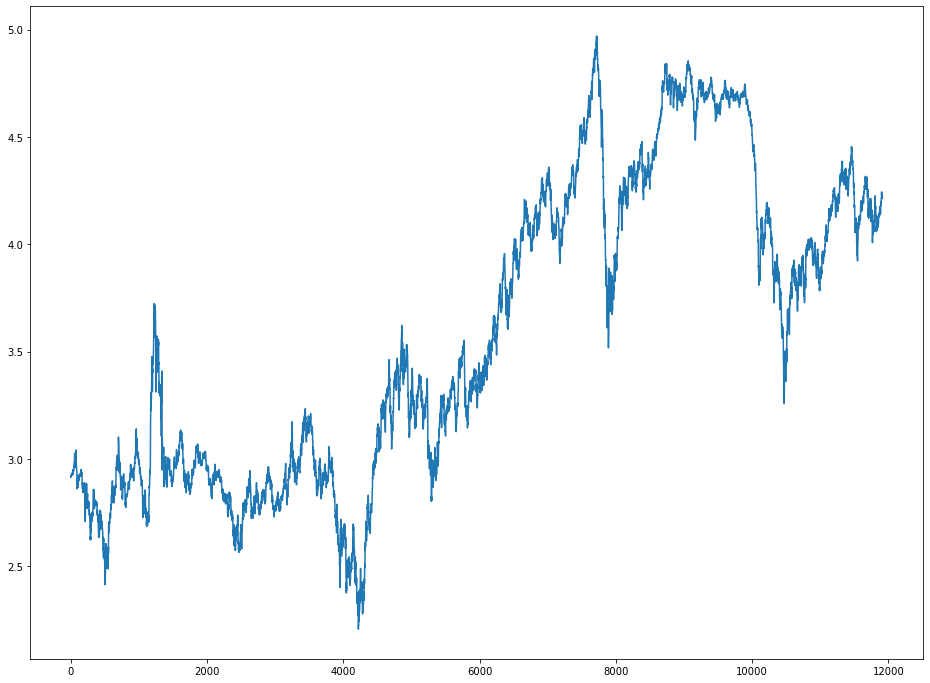

In [ ]:
plt.plot(prices_log)

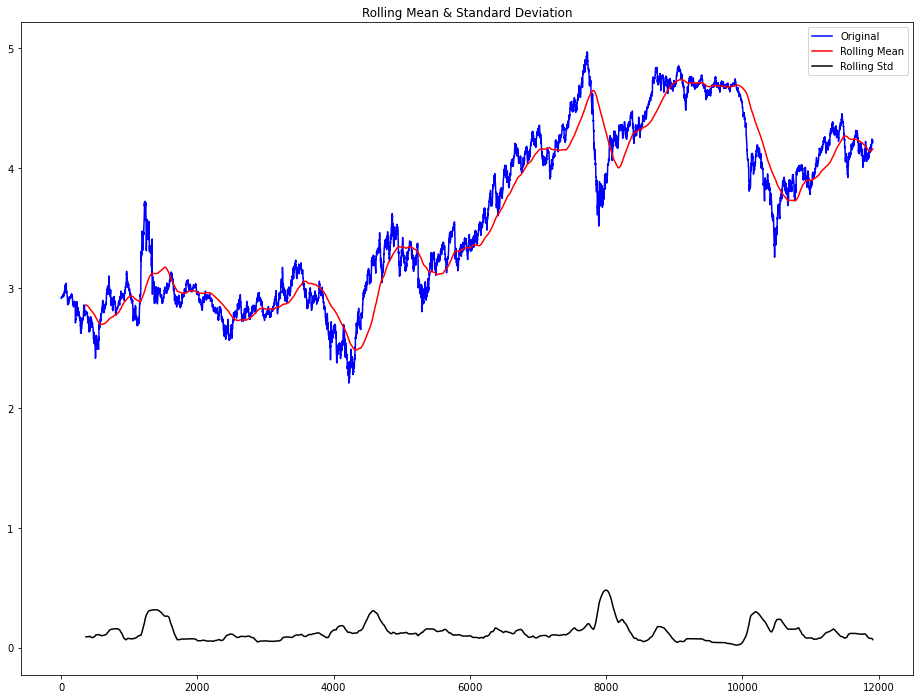

Results of Dickey-Fuller Test:
Test Statistic                    -1.515619
p-value                            0.525771
#Lags Used                        31.000000
Number of Observations Used    11881.000000
Critical Value (1%)               -3.430901
Critical Value (5%)               -2.861783
Critical Value (10%)              -2.566900
dtype: float64


In [ ]:
test_stationarity(prices_log)

### 2. Square-Root Transformation

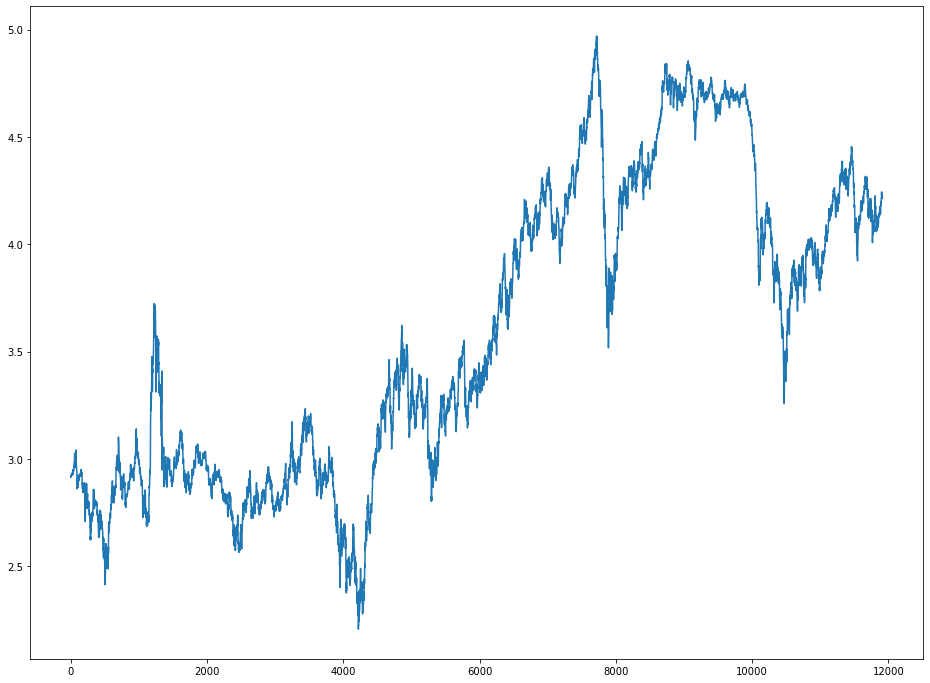

In [ ]:
prices_sqrt = np.sqrt(train.Oil_Prices)
plt.plot(prices_log)

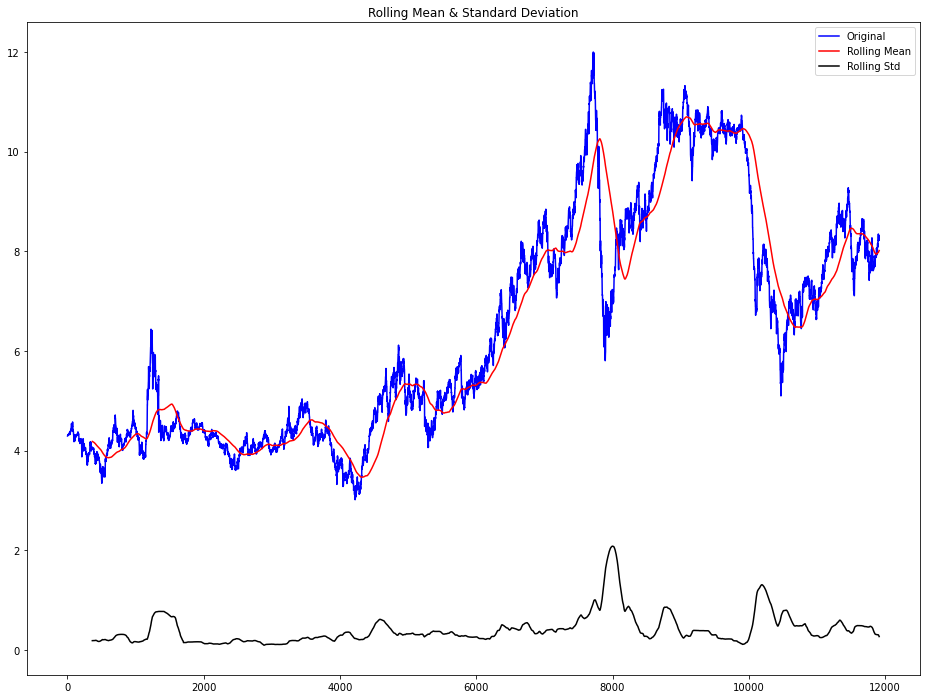

Results of Dickey-Fuller Test:
Test Statistic                    -1.600003
p-value                            0.483592
#Lags Used                        35.000000
Number of Observations Used    11877.000000
Critical Value (1%)               -3.430901
Critical Value (5%)               -2.861783
Critical Value (10%)              -2.566900
dtype: float64


In [ ]:
test_stationarity(prices_sqrt)

### 3. Differentiating by 1 and 2 on the Log Transformation

In [ ]:
log_diff1=prices_log.diff(1).dropna()
log_diff2=prices_log.diff(2).dropna()

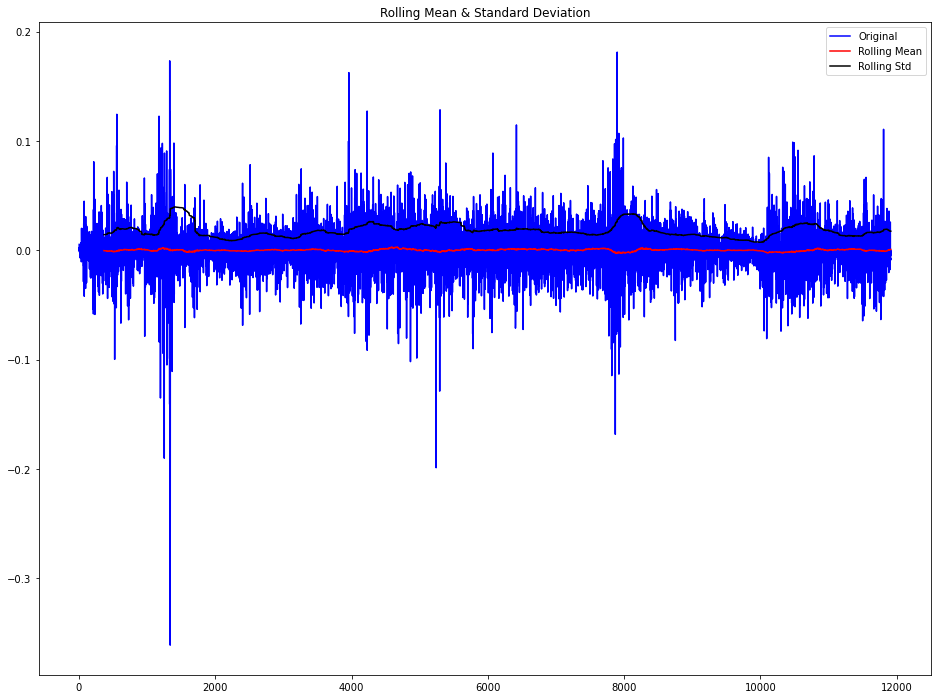

Results of Dickey-Fuller Test:
Test Statistic                   -19.135346
p-value                            0.000000
#Lags Used                        30.000000
Number of Observations Used    11881.000000
Critical Value (1%)               -3.430901
Critical Value (5%)               -2.861783
Critical Value (10%)              -2.566900
dtype: float64


In [ ]:
test_stationarity(log_diff1)

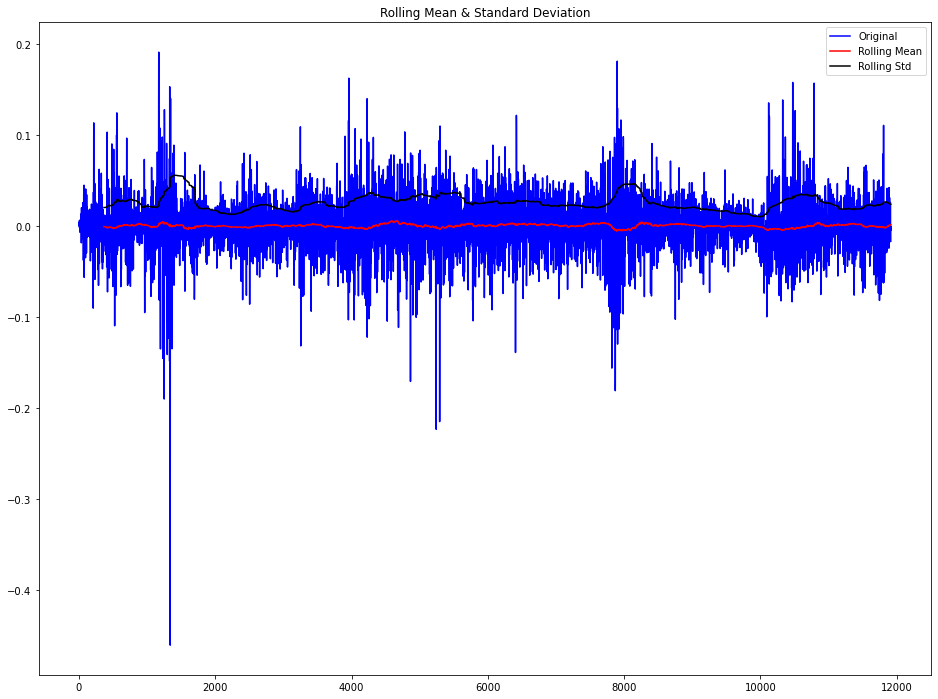

Results of Dickey-Fuller Test:
Test Statistic                -1.605699e+01
p-value                        5.693077e-29
#Lags Used                     4.000000e+01
Number of Observations Used    1.187000e+04
Critical Value (1%)           -3.430901e+00
Critical Value (5%)           -2.861784e+00
Critical Value (10%)          -2.566900e+00
dtype: float64


In [ ]:
test_stationarity(log_diff2)

###  Seasonality (along with trend)
Previously we saw just trend part of the time series, now we will see both trend and seasonality. Our series has trend along with seasonality. So there are two common methods to remove trend and seasonality as follows:

• Differencing: by taking difference using time lag also known as Time-shift transformation

• Decomposition: modeling both trend and seasonality, then removing them

### 1. Time-Shift transformation / Differencing

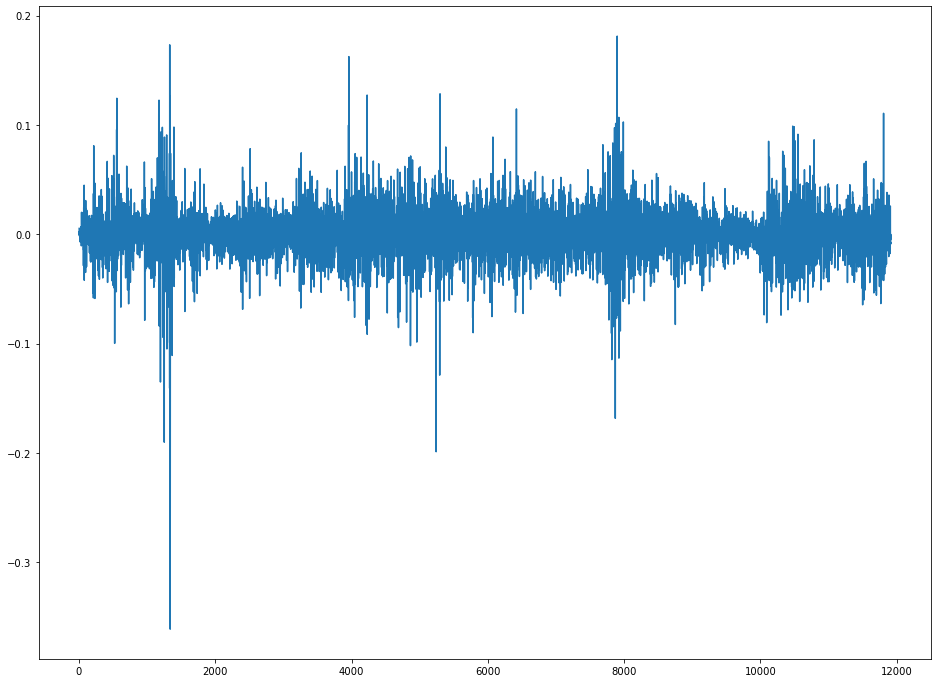

In [ ]:
prices_log_diff = prices_log- prices_log.shift()
plt.plot(prices_log_diff)

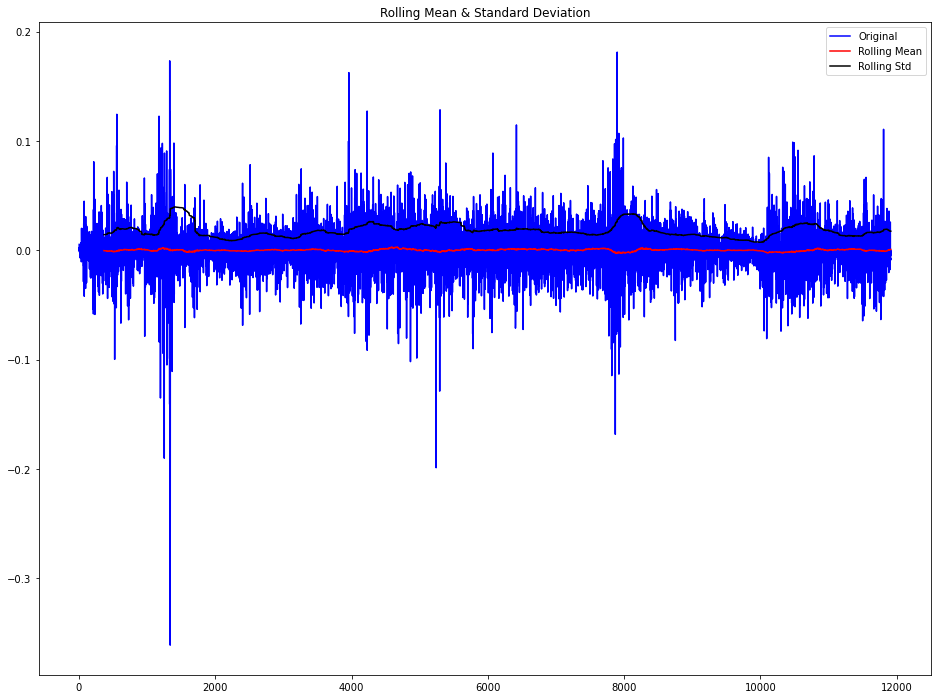

Results of Dickey-Fuller Test:
Test Statistic                   -19.135346
p-value                            0.000000
#Lags Used                        30.000000
Number of Observations Used    11881.000000
Critical Value (1%)               -3.430901
Critical Value (5%)               -2.861783
Critical Value (10%)              -2.566900
dtype: float64


In [ ]:
prices_log_diff.dropna(inplace=True)
test_stationarity(prices_log_diff)

### 2. Seasonal Decomposing using the logarithmic transformed values of the prices

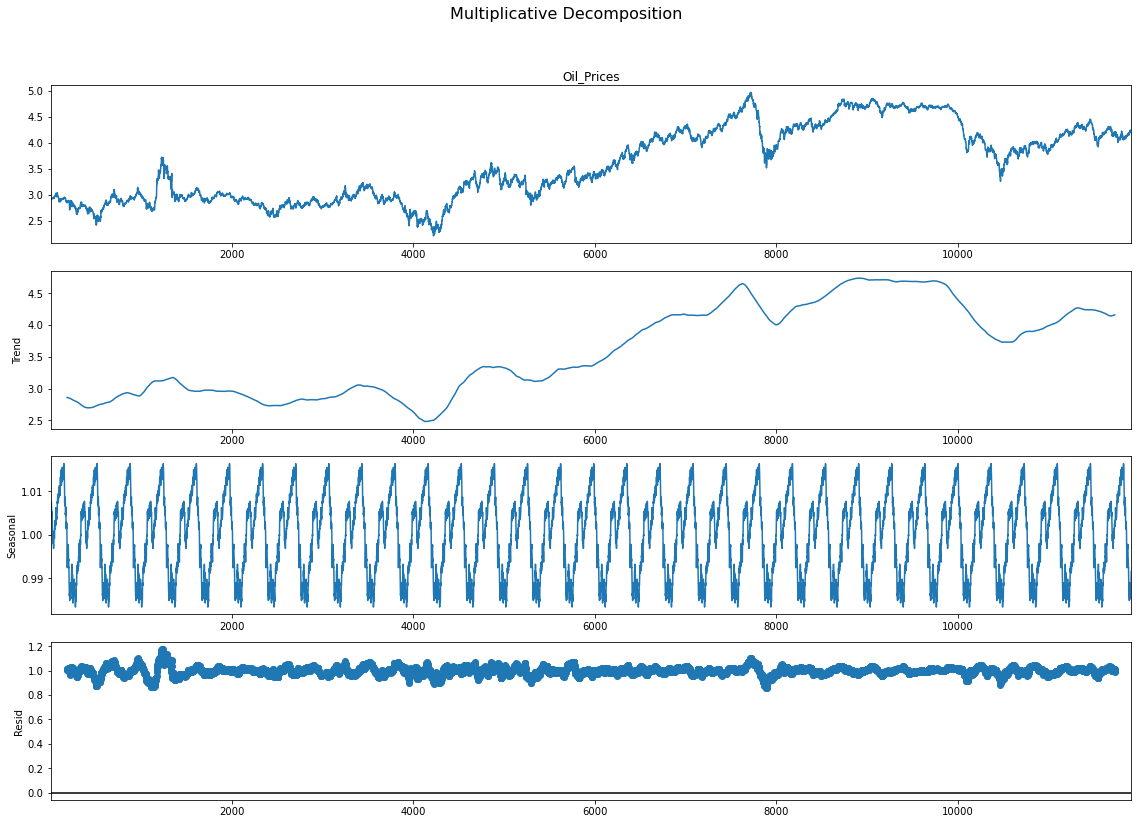

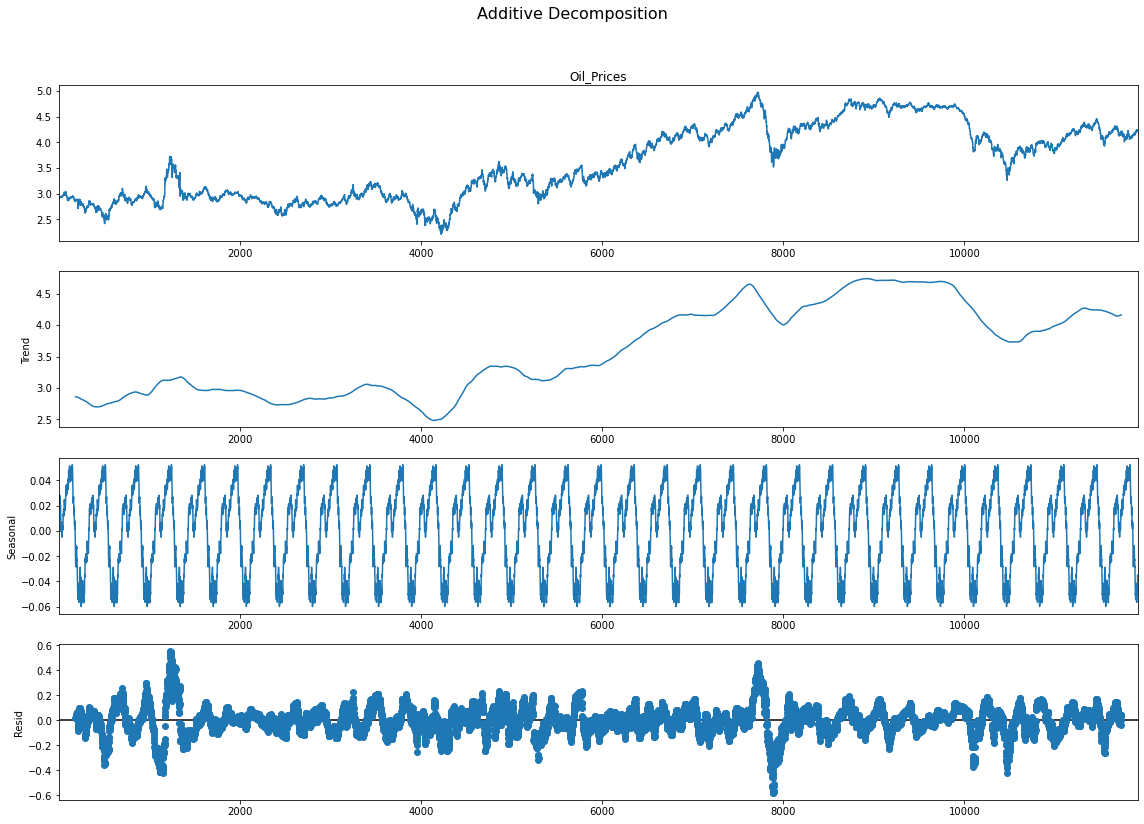

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse


# Multiplicative Decomposition 
multiplicative_decomposition = seasonal_decompose(prices_log, model='multiplicative', period=365)

# Additive Decomposition
additive_decomposition = seasonal_decompose(prices_log, model='additive', period=365)

# Plot
plt.rcParams.update({'figure.figsize': (16,12)})
multiplicative_decomposition.plot().suptitle('Multiplicative Decomposition', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

additive_decomposition.plot().suptitle('Additive Decomposition', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.show()

From the above graphs, it is observed that the additive decompositon model seems to be a good fit for series and we can see an increasing trend as well as a seasonal pattern with a cycle of 12 months. So removing the trend and seasonality from the Time series by using the residual values of the additive decomposition model and checking stationarity as follows.

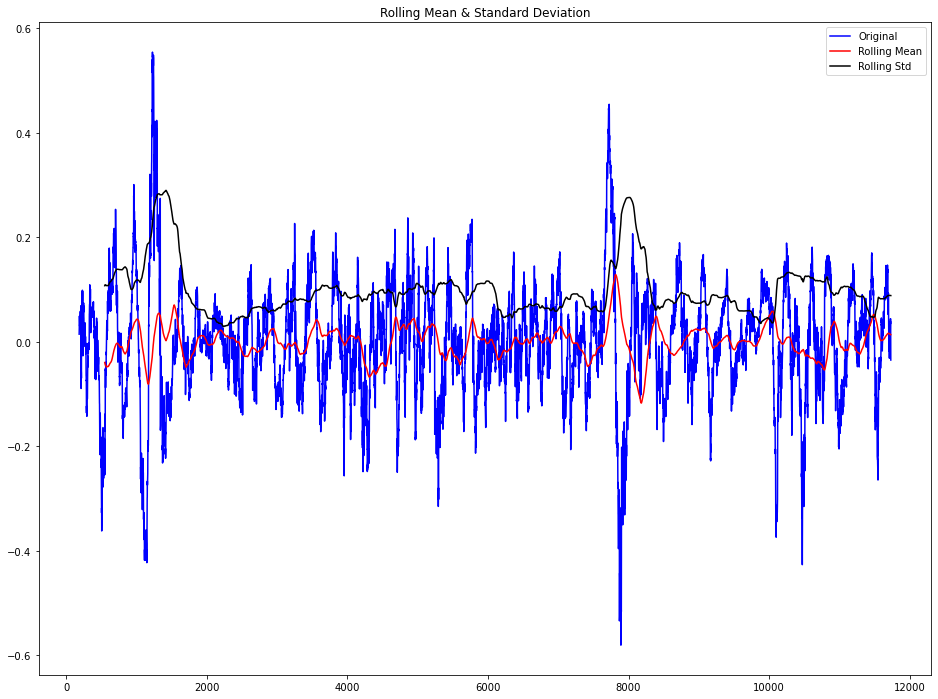

Results of Dickey-Fuller Test:
Test Statistic                -1.011727e+01
p-value                        9.650476e-18
#Lags Used                     3.700000e+01
Number of Observations Used    1.151100e+04
Critical Value (1%)           -3.430918e+00
Critical Value (5%)           -2.861791e+00
Critical Value (10%)          -2.566904e+00
dtype: float64


In [ ]:
residuals = additive_decomposition.resid
prices_log_decompose = residuals
prices_log_decompose.dropna(inplace=True)
test_stationarity(prices_log_decompose)

## Model Building 